## Default of Credit Card Clients Dataset
Default Payments of Credit Card Clients in Taiwan from 2005

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay 
for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# sort features

target = "default.payment.next.month"
categorical_features = ["SEX", "EDUCATION", "MARRIAGE"]
ordinal_features = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
numerical_features = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
                      "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]

In [2]:
# setup

# 3rd party
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# stdlib
import os

pd.options.display.max_columns = None

filename = "UCI_Credit_Card.csv"

In [3]:
# utility functions 

def correlation_heatmap(corr_df):
    color = "white"
    plt.rcParams['text.color'] = color
    plt.rcParams['axes.labelcolor'] = color
    plt.rcParams['xtick.color'] = color
    plt.rcParams['ytick.color'] = color
    plt.figure(figsize=(30,35))
    sns.heatmap(corr_df, annot=True, cmap=plt.cm.Reds)
    # plt.show()
    #####
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() 
    

def find_correlations(corr_df, threshold):
    relevant = {}
    for column in corr_df.columns:
        corr_df[column].loc[column] = 0 # replace equal pairs with 0 since correlation has to be 1
        series_above_th = corr_df.loc[column].loc[abs(corr_df.loc[column])>threshold]
        i = 0
        for index in series_above_th.index:
            if (index+"---"+column) not in relevant: # avoid redundant entries
                relevant[column+"---"+index] = series_above_th[i]
            i += 1
    return relevant


def show_correlations(df, correlations):
    for element in correlations:
        (first,second)=element.split("---")
        print(f"{first} and {second} have a pearson correlation of {correlations[element]}")
        plt.figure(figsize=(8,10))
        plt.scatter(df[first], df[second])
        plt.show()
        

def analyze_correlations(df, threshold=0.9):
    corr_df = df.corr(method="pearson")
    correlation_heatmap(corr_df)
    print("\n\n*********************************************")
    print(f"Showing correlations above {threshold} (absolute value)")
    print("*********************************************\n\n")
    show_correlations(df, find_correlations(corr_df, threshold))

In [4]:
# ingest

os.chdir("..")
filepath = os.getcwd() + "\data\\" + filename

df = pd.read_csv(filepath)
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [5]:
# check for NaNs and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# check for std = 0 and similar

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Visualization - Setup

In [7]:
color = "white"
plt.rcParams["text.color"] = color
plt.rcParams["axes.labelcolor"] = color
plt.rcParams["xtick.color"] = color
plt.rcParams["ytick.color"] = color

## Visualization - Categorical

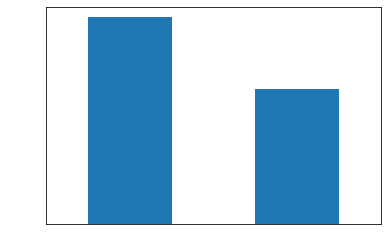

In [8]:
df["SEX"].value_counts().plot(kind ="bar")

# SEX: Gender (1=male, 2=female)

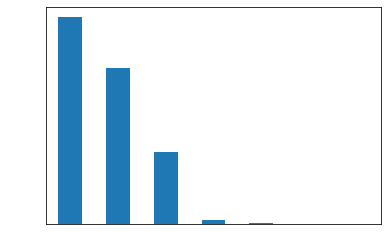

In [9]:
df["EDUCATION"].value_counts().plot(kind ="bar")

# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

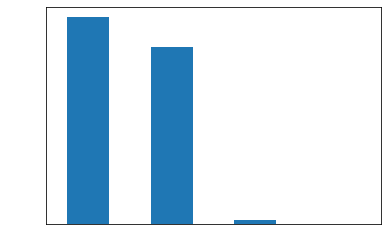

In [10]:
df["MARRIAGE"].value_counts().plot(kind ="bar")

# MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [11]:
df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


## Visualization Results - Categorical

Todos: 

Marriage: Collapse 0 and 3

Education: Collapse 5,6,0


## Visualization - Ordinal

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay 
for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E114CAA9C8>,
      dtype=object)

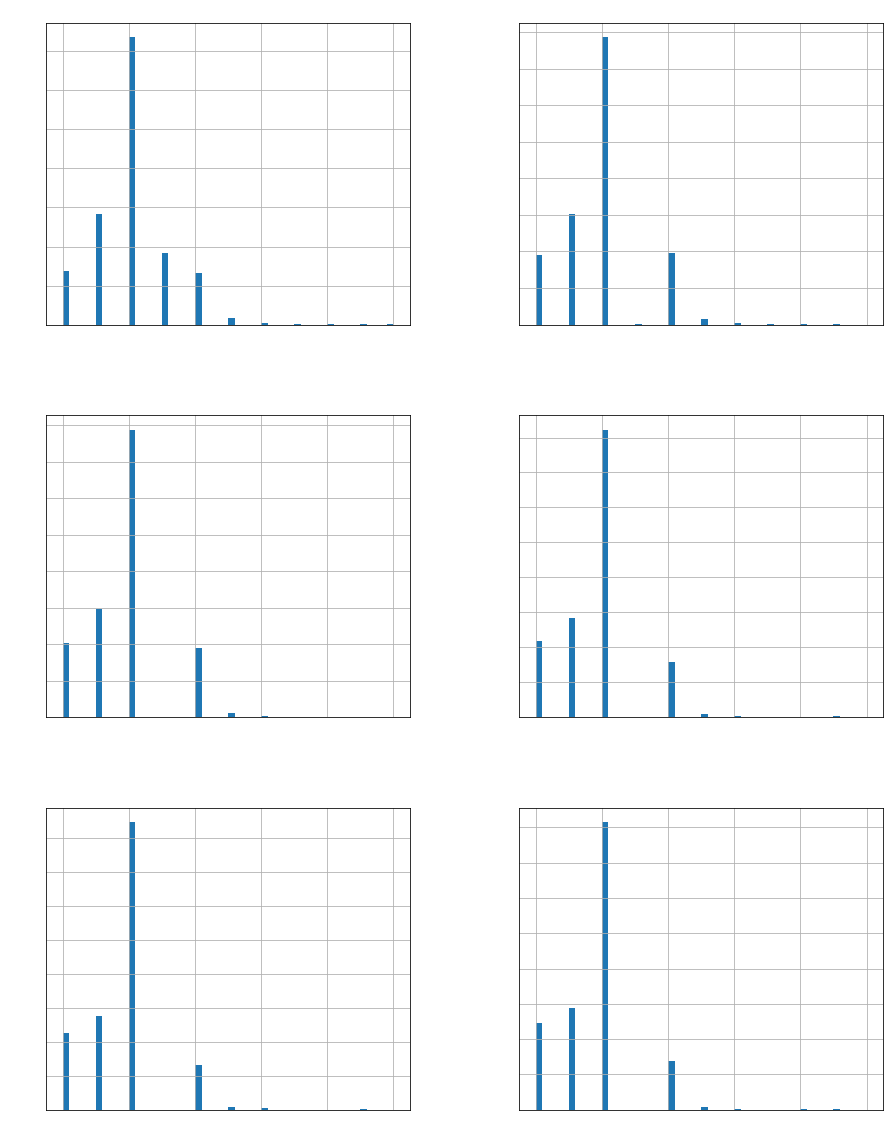

In [12]:
ordinal_df = df[ordinal_features]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
ordinal_df.hist(bins=50, ax=ax)

In [13]:
ordinal_df.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


## Visualization Results - Ordinal

Todos: 

Clean up unexplained values of 0 and -2


## Visualization - Numerical


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E115A72488>,
      dtype=object)

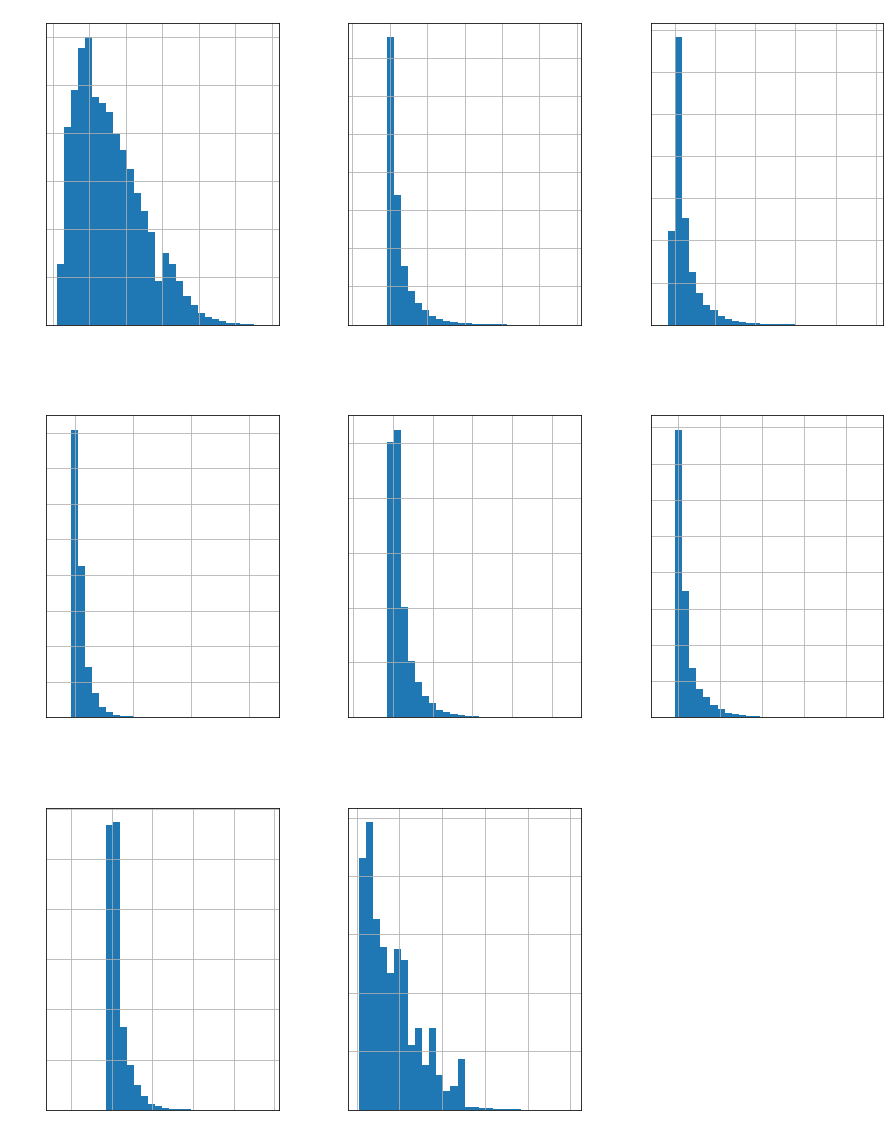

In [14]:
numerical_df = df[numerical_features]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
numerical_df.hist(bins=30, ax=ax)

In [15]:
numerical_df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


## Correlation Analysis

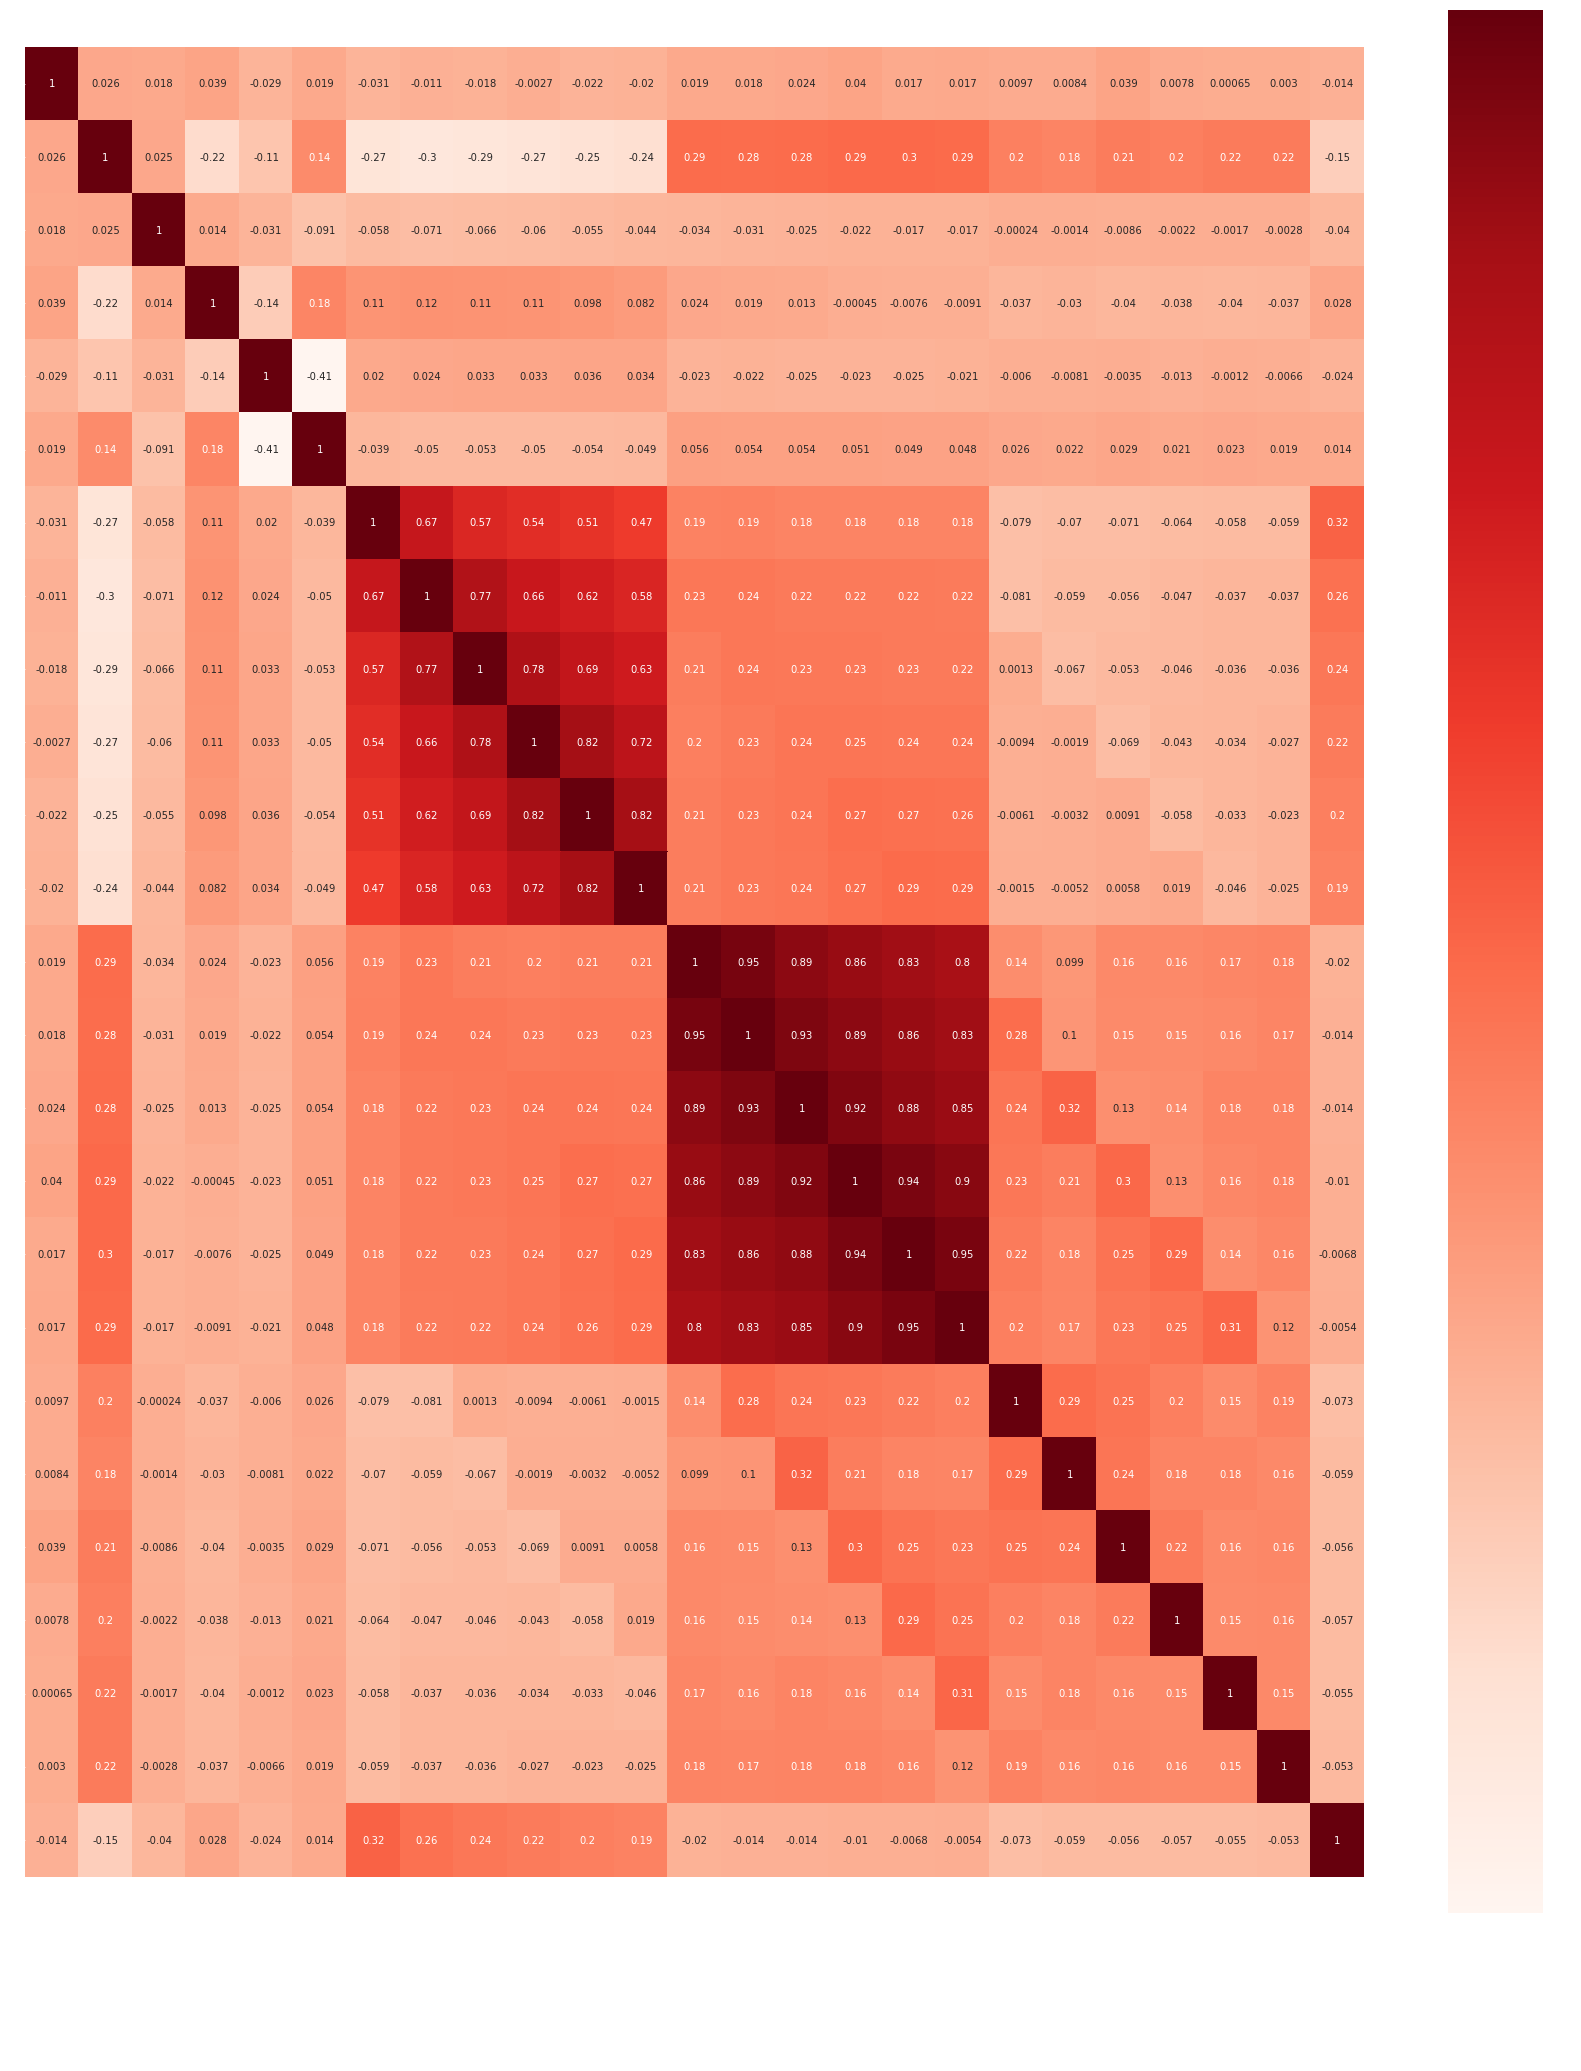



*********************************************
Showing correlations above 0.9 (absolute value)
*********************************************


BILL_AMT1 and BILL_AMT2 have a pearson correlation of 0.9514836727518374


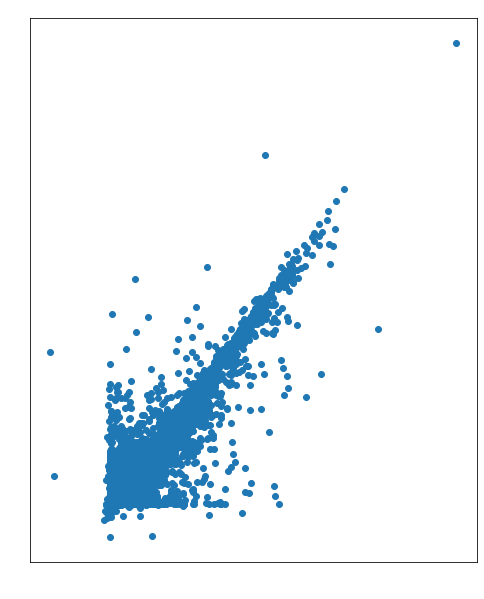

BILL_AMT2 and BILL_AMT3 have a pearson correlation of 0.9283262592714886


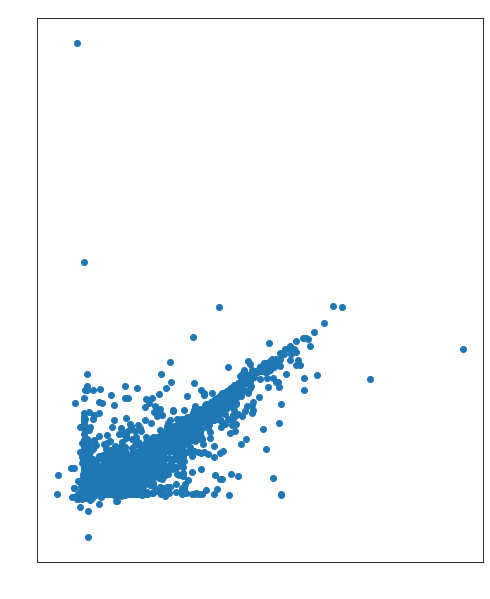

BILL_AMT3 and BILL_AMT4 have a pearson correlation of 0.9239694565909764


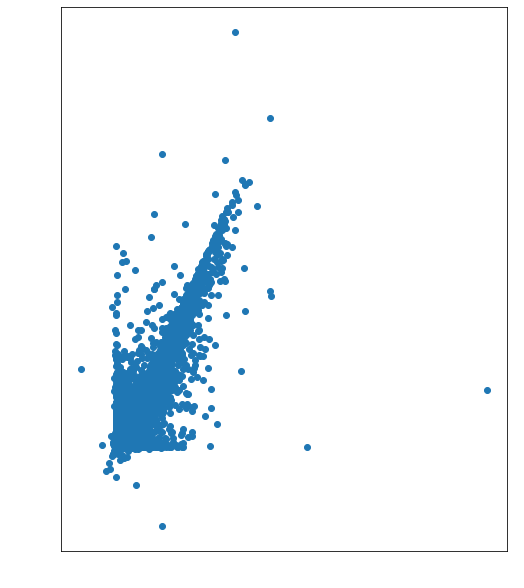

BILL_AMT4 and BILL_AMT5 have a pearson correlation of 0.9401344040880266


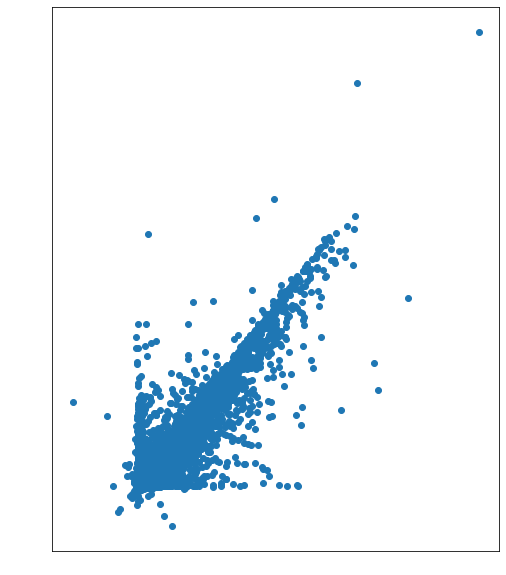

BILL_AMT4 and BILL_AMT6 have a pearson correlation of 0.9009409547979025


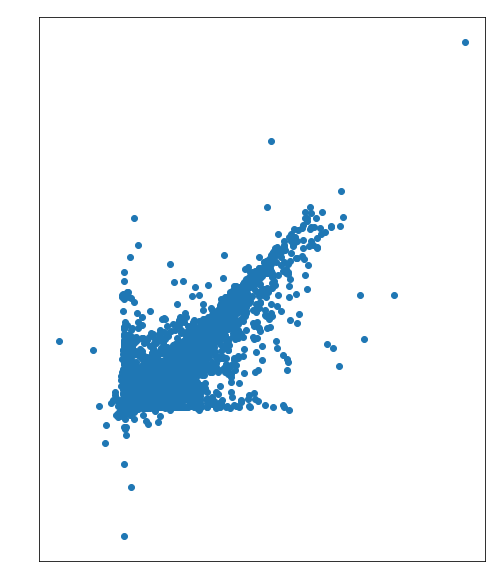

BILL_AMT5 and BILL_AMT6 have a pearson correlation of 0.9461968070522464


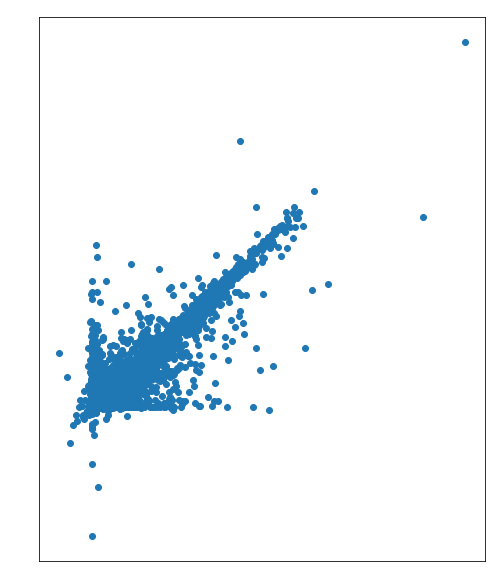

In [16]:

analyze_correlations(df)

## Numerical Analysis -  Results

No surprises - strong correlation among lagged time features. All correlations to target weak. No strong correlation in features not related by time. Outliers seem to make sense. No todos. 

## Summary Todos

Marriage: Collapse 0 and 3 into 3 (others)

Education: Collapse 5,6,0 into 5 (unknown)

PAY_X: Delete Values 0 and -2 (not explained)

Possibly in Education: Collapse 5,6,0 (unknown) into 4 (others)
